In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/df_clean.csv')
df_zip = pd.read_csv('data/df_final.csv')
df_original = pd.read_csv('data/df_original.csv')

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [34]:
columns = ['id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_original.dropna(inplace = True)
X = df_original.drop(columns = ['Unnamed: 0', 'price', 'date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement'])
y = df_original['price']
#running our baseline model on all numerical variables
model_base = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1927.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:15:01   Log-Likelihood:            -2.1668e+05
No. Observations:               15762   AIC:                         4.334e+05
Df Residuals:                   15747   BIC:                         4.335e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.403e+07   3.78e+06     -3.716      0.000   -2.14e+07   -6.63e+06
id            -4.058e-07   6.35e-07     -0.639      0.523   -1.65e-06    8.38e-07
bedrooms      -5.942e+04   2425.821    -24.494      0.000   -6.42e+04   -5.47e+04
bathrooms      6.011e+04   4267.281     14.087      0.000    5.17e+04    6.85e+04
sqft_living     229.4344      5.529     41.493      0.000     218.596     240.273
sqft_lot          0.1642      0.062      2.629      0.009       0.042       0.287
floors         1.944e+04   4713.871      4.124      0.000    1.02e+04    2.87e+04
sqft_above       37.6398      5.569      6.759      0.000      26.725      48.555
yr_built      -2476.5284     87.469    -28.313      0.000   -2647.978   -2305.079
yr_renovated     32.9835      4.761      6.928      0.000      23.652      42.315
zipcode        -553.9654     42.920    -12.907      0.000    -638.094    -469.837
lat            6.251e+05   1.38e+04     45.168      0.000    5.98e+05    6.52e+05
long           -3.55e+05    1.7e+04    -20.827      0.000   -3.88e+05   -3.22e+05
sqft_living15    81.2595      4.278     18.994      0.000      72.874      89.645
sqft_lot15       -0.3658      0.094     -3.884      0.000      -0.550      -0.181
==============================================================================
Omnibus:                    12977.460   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           912980.145
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      39.621   Cond. No.                     1.14e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
lr.fit(X_train, y_train) #print(lr.coef_) #print(X.columns)

print("intercept = ", lr.intercept_) 
print('R2 for training = ', lr.score(X_train, y_train)) 
print('R2 for test = ', lr.score(X_test,y_test)) 
y_pred = lr.predict(X_test) 
MAE = mean_absolute_error(y_pred, y_test) 
print("MAE = ", MAE) 
RMSE = np.sqrt(mean_squared_error(y_pred, y_test)) 
print("RMSE = ",RMSE)

intercept =  -13072804.940846618
R2 for training =  0.6320424610775952
R2 for test =  0.6278194593447972
MAE =  140111.27406293422
RMSE =  224901.79881296968


Text(70.375, 0.5, 'Actual Price')

<Figure size 1440x1440 with 0 Axes>

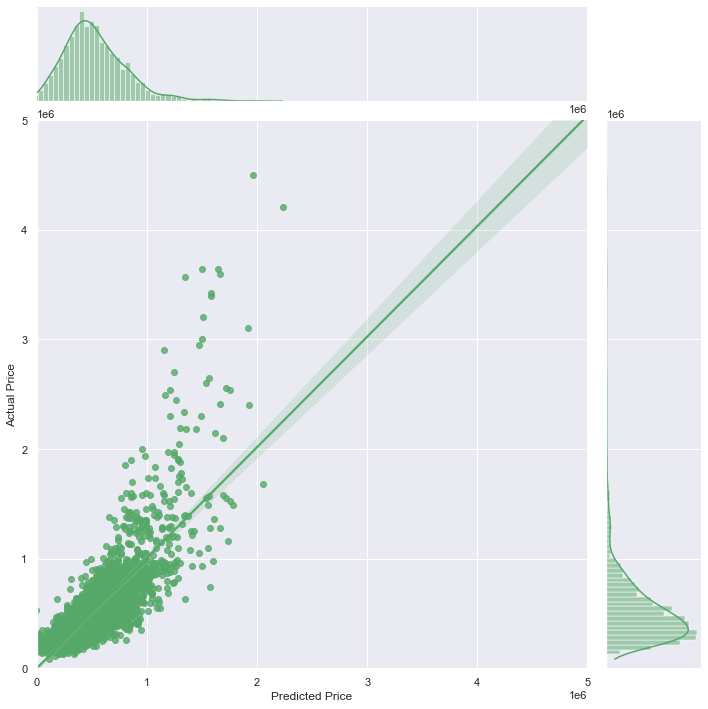

In [37]:
sns.set_palette("pastel", color_codes = False) 
sns.set(style = "darkgrid") 
plt.figure(figsize = (20,20)) 
g = sns.jointplot(x=y_pred, y=y_test, kind="reg", truncate=False, xlim=(0, 5e6), ylim=(0, 5e6), color="g",height=10, palette = 'pastel')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

In [38]:
weights = model_base.params
weights

const           -1.402823e+07
id              -4.058381e-07
bedrooms        -5.941889e+04
bathrooms        6.011210e+04
sqft_living      2.294344e+02
sqft_lot         1.641782e-01
floors           1.943930e+04
sqft_above       3.763981e+01
yr_built        -2.476528e+03
yr_renovated     3.298353e+01
zipcode         -5.539654e+02
lat              6.251217e+05
long            -3.550383e+05
sqft_living15    8.125947e+01
sqft_lot15      -3.657505e-01
dtype: float64

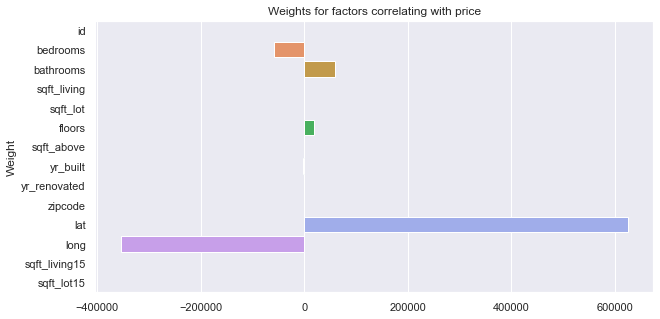

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

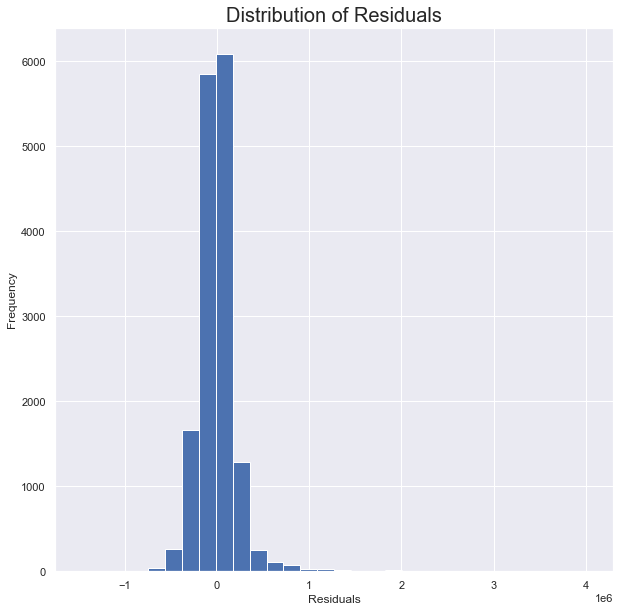

In [40]:
plt.figure(figsize = (10,10))
plt.hist(model_base.resid, bins = 30, )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontsize = 20)

In [41]:
X = df.drop(columns=['price','waterfront', 'City', 'renovate_bool'])
y = df['price']
#our first model on all cleaned and added data
model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1127.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:20:02   Log-Likelihood:            -2.0610e+05
No. Observations:               15245   AIC:                         4.122e+05
Df Residuals:                   15223   BIC:                         4.124e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.601e+08   5.71e+06     28.059      0.000    1.49e+08    1.71e+08
Unnamed: 0        0.6485      0.342      1.896      0.058      -0.022       1.319
bedrooms      -5.805e+04   3636.796    -15.963      0.000   -6.52e+04   -5.09e+04
bathrooms      8.852e+04   6376.360     13.882      0.000     7.6e+04    1.01e+05
sqft_living      92.7596      3.267     28.397      0.000      86.357      99.162
sqft_lot          0.1489      0.050      2.986      0.003       0.051       0.247
floors         6.332e+04   6927.597      9.141      0.000    4.97e+04    7.69e+04
sqft_above       59.8657      4.097     14.611      0.000      51.835      67.897
sqft_basement    32.8623      4.533      7.250      0.000      23.978      41.747
yr_built      -1996.1295     82.693    -24.139      0.000   -2158.218   -1834.041
yr_renovated     20.4283      3.928      5.200      0.000      12.728      28.128
zipcode       -1595.8494     58.484    -27.287      0.000   -1710.486   -1481.213
sqft_living15   132.3204      3.573     37.031      0.000     125.316     139.324
sqft_lot15       -0.3548      0.076     -4.654      0.000      -0.504      -0.205
cond_num       -530.4227   2288.036     -0.232      0.817   -5015.247    3954.402
grade_num      1144.2852   1319.340      0.867      0.386   -1441.780    3730.350
view_num        -65.9502   1967.874     -0.034      0.973   -3923.219    3791.318
bed/bath       5.129e+04   5761.234      8.903      0.000       4e+04    6.26e+04
avg_fl_space     53.4828      8.384      6.379      0.000      37.049      69.916
water_bool     4.107e+05   2.04e+04     20.141      0.000    3.71e+05    4.51e+05
base_bool      3.285e+04   5712.491      5.750      0.000    2.17e+04     4.4e+04
Population_x     -2.1721      0.137    -15.850      0.000      -2.441      -1.904
city_pop          0.3332      0.010     34.844      0.000       0.314       0.352
==============================================================================
Omnibus:                     3192.516   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11617.612
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                       6.755   Cond. No.                     1.15e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
lr.fit(X_train, y_train) #print(lr.coef_) #print(X.columns)

print("intercept = ", lr.intercept_) 
print('R2 for training = ', lr.score(X_train, y_train)) 
print('R2 for test = ', lr.score(X_test,y_test)) 
y_pred = lr.predict(X_test) 
MAE = mean_absolute_error(y_pred, y_test) 
print("MAE = ", MAE) 
RMSE = np.sqrt(mean_squared_error(y_pred, y_test)) 
print("RMSE = ",RMSE)

intercept =  158350219.71105668
R2 for training =  0.6102688294608924
R2 for test =  0.5994457889396851
MAE =  131269.76681170077
RMSE =  180705.57709680765


Text(70.375, 0.5, 'Actual Price')

<Figure size 1440x1440 with 0 Axes>

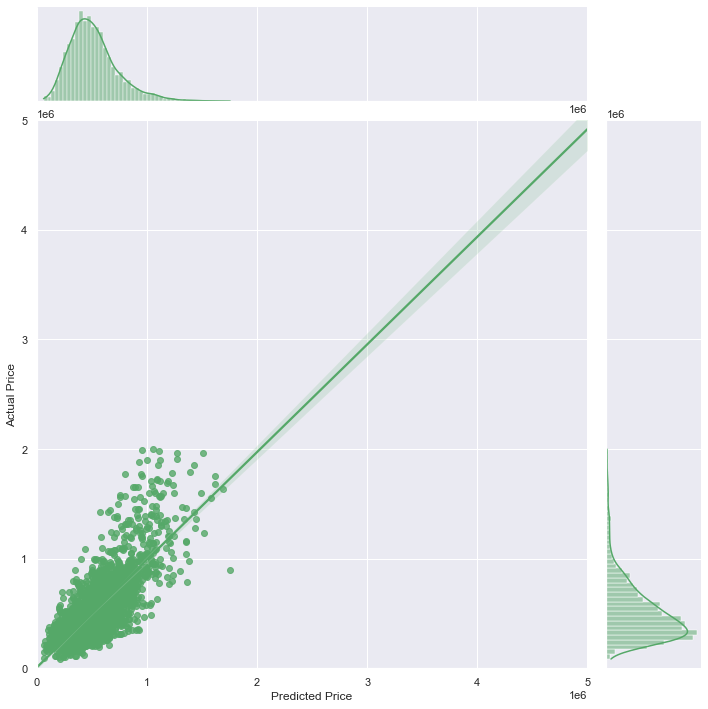

In [43]:
sns.set_palette("pastel", color_codes = False) 
sns.set(style = "darkgrid") 
plt.figure(figsize = (20,20)) 
g = sns.jointplot(x=y_pred, y=y_test, kind="reg", truncate=False, xlim=(0, 5e6), ylim=(0, 5e6), color="g",height=10, palette = 'pastel')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

In [44]:
weights = model_1.params
weights.sort_values(ascending = False)

const            1.600782e+08
water_bool       4.106521e+05
bathrooms        8.851587e+04
floors           6.332226e+04
bed/bath         5.128942e+04
base_bool        3.284850e+04
grade_num        1.144285e+03
sqft_living15    1.323204e+02
sqft_living      9.275962e+01
sqft_above       5.986572e+01
avg_fl_space     5.348282e+01
sqft_basement    3.286229e+01
yr_renovated     2.042834e+01
Unnamed: 0       6.484750e-01
city_pop         3.332033e-01
sqft_lot         1.488794e-01
sqft_lot15      -3.547644e-01
Population_x    -2.172133e+00
view_num        -6.595019e+01
cond_num        -5.304227e+02
zipcode         -1.595849e+03
yr_built        -1.996129e+03
bedrooms        -5.805453e+04
dtype: float64

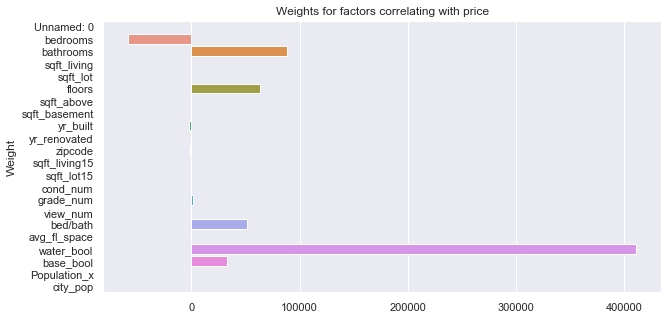

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

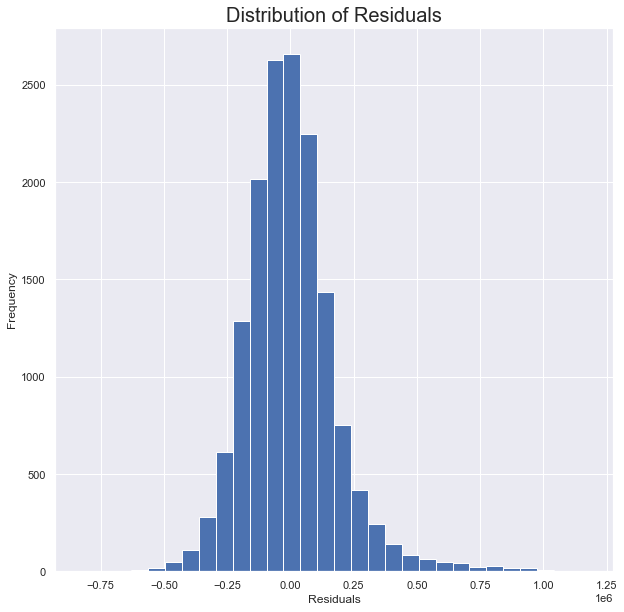

In [46]:
plt.figure(figsize = (10,10))
plt.hist(model_1.resid, bins = 30, )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontsize = 20)

In [112]:
X = df_zip.drop(columns=['price','waterfront', 'City', 'bedrooms', 'bathrooms', 'Unnamed: 0', 'sqft_lot15',
                        'sqft_lot', 'zipcode', 'sqft_above', 'city_pop', 'base_bool', 
                         'grade_num', 'view_num', 'cond_num', 'yr_renovated', 'sqft_basement'])
y = df_zip['price']
#our final model on all variables including zipcodes, and with variables containing high pvalues removed
model_2 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     798.2
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:38:04   Log-Likelihood:            -1.9610e+05
No. Observations:               14897   AIC:                         3.923e+05
Df Residuals:                   14819   BIC:                         3.929e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.332e+05   1.05e+05      7.927      0.000    6.27e+05    1.04e+06
sqft_living     149.5140      2.513     59.494      0.000     144.588     154.440
floors         2.669e+04   3418.305      7.808      0.000       2e+04    3.34e+04
yr_built       -419.4139     59.079     -7.099      0.000    -535.216    -303.612
sqft_living15    70.6964      2.664     26.537      0.000      65.474      75.918
bed/bath      -1.252e+04   1984.764     -6.310      0.000   -1.64e+04   -8633.124
avg_fl_space     50.1464      4.551     11.019      0.000      41.226      59.067
water_bool     4.961e+05   1.53e+04     32.496      0.000    4.66e+05    5.26e+05
renovate_bool  3.712e+04   5655.239      6.563      0.000     2.6e+04    4.82e+04
Population_x     -6.7372      0.437    -15.411      0.000      -7.594      -5.880
98002          2.816e+04   1.34e+04      2.106      0.035    1952.618    5.44e+04
98003          8.908e+04   1.48e+04      6.011      0.000       6e+04    1.18e+05
98004          6.762e+05   1.15e+04     58.888      0.000    6.54e+05    6.99e+05
98005          2.435e+05   1.28e+04     19.034      0.000    2.18e+05    2.69e+05
98006          3.329e+05   1.18e+04     28.155      0.000     3.1e+05    3.56e+05
98007          2.217e+05   1.46e+04     15.230      0.000    1.93e+05     2.5e+05
98008          2.145e+05    1.1e+04     19.519      0.000    1.93e+05    2.36e+05
98010         -9.939e+04   1.72e+04     -5.773      0.000   -1.33e+05   -6.56e+04
98011          9.918e+04   1.32e+04      7.519      0.000    7.33e+04    1.25e+05
98014         -3.958e+04   1.55e+04     -2.557      0.011   -6.99e+04   -9234.682
98019         -7.572e+04   1.37e+04     -5.535      0.000   -1.03e+05   -4.89e+04
98022         -3.423e+04   1.17e+04     -2.935      0.003   -5.71e+04   -1.14e+04
98023          8.853e+04   1.48e+04      5.967      0.000    5.95e+04    1.18e+05
98024          1.082e+04    1.8e+04      0.603      0.547   -2.44e+04     4.6e+04
98027          1.431e+05   1.02e+04     14.018      0.000    1.23e+05    1.63e+05
98028           4.78e+04   1.09e+04      4.404      0.000    2.65e+04    6.91e+04
98029          1.871e+05   1.06e+04     17.706      0.000    1.66e+05    2.08e+05
98030          1.244e+04   1.28e+04      0.973      0.331   -1.26e+04    3.75e+04
98031          4.781e+04   1.31e+04      3.659      0.000    2.22e+04    7.34e+04
98032          3.117e+04   1.55e+04      2.013      0.044     821.464    6.15e+04
98033           3.93e+05   1.14e+04     34.397      0.000    3.71e+05    4.15e+05
98034          2.641e+05   1.25e+04     21.071      0.000     2.4e+05    2.89e+05
98038          2.422e+04      1e+04      2.411      0.016    4529.057    4.39e+04
98039          7.247e+05   2.78e+04     26.045      0.000     6.7e+05    7.79e+05
98040           4.73e+05   1.13e+04     41.819   

In [131]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
lr.fit(X_train, y_train) #print(lr.coef_) #print(X.columns)

print("intercept = ", lr.intercept_) 
print('R2 for training = ', lr.score(X_train, y_train)) 
print('R2 for test = ', lr.score(X_test,y_test)) 
y_pred = lr.predict(X_test) 
MAE = mean_absolute_error(y_pred, y_test) 
print("MAE = ", MAE) 
RMSE = np.sqrt(mean_squared_error(y_pred, y_test)) 
print("RMSE = ",RMSE)

intercept =  -1922453214231.319
R2 for training =  0.8052246952085478
R2 for test =  0.8066322136659266
MAE =  87545.85969508639
RMSE =  125861.9195041602


Text(61.125, 0.5, 'Actual Price')

<Figure size 1440x1440 with 0 Axes>

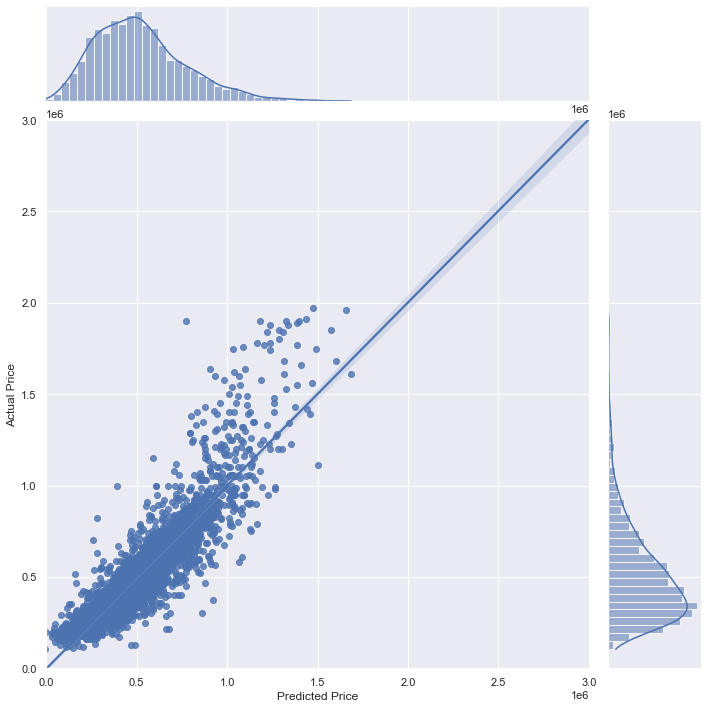

In [126]:
sns.set_palette("pastel", color_codes = False) 
sns.set(style = "darkgrid") 
plt.figure(figsize = (20,20)) 
sns.jointplot(x=y_pred, y=y_test, kind="reg", truncate=False, xlim=(0, 3e6), ylim=(0, 3e6), color="b",height=10, palette = 'pastel')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

In [115]:
weights = model_2.params
print(weights.sort_values().head(10))
print(weights.sort_values().tail(10))

98010      -99394.541163
98148      -90598.729463
98019      -75718.307731
98065      -40461.248190
98014      -39576.883023
98022      -34232.986851
98070      -23622.929791
98055      -22772.758010
98188      -22521.678273
bed/bath   -12523.508344
dtype: float64
98119         440032.070158
98103         451480.371156
98115         457902.909447
98040         473046.843359
water_bool    496108.637798
98112         515442.621825
98105         566460.675114
98004         676190.162517
98039         724663.069446
const         833244.535142
dtype: float64


In [116]:
weights_min = weights.sort_values().head(6)
weights_max = weights.sort_values().tail(7)

wmin = dict(weights_min)
wmax = dict(weights_max)
print(wmin.update(wmax))
del wmin['water_bool']
del wmin['const']
print(wmin.keys())
wmin.values()
#pd.concat(weights_minmax, weights.sort_values().tail(7))

None
dict_keys(['98010', '98148', '98019', '98065', '98014', '98022', '98040', '98112', '98105', '98004', '98039'])


dict_values([-99394.54116262781, -90598.72946285809, -75718.3077309948, -40461.248189820384, -39576.88302346684, -34232.98685103526, 473046.84335920203, 515442.6218253087, 566460.6751141015, 676190.1625165272, 724663.0694461842])

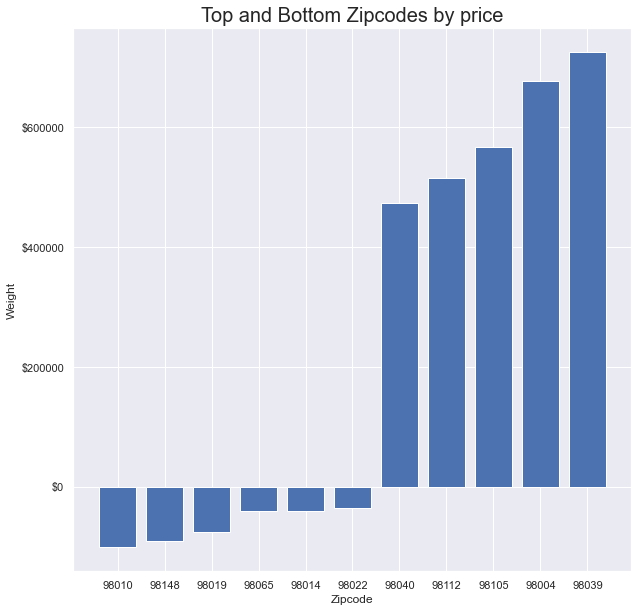

In [117]:
data = wmin
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize = (10,10))
plt.bar(range(len(data)), values, tick_label=names)
plt.ylabel("Weight")
axs.yaxis.set_major_formatter('${x:1.0f}')
plt.xlabel("Zipcode")
plt.title("Top and Bottom Zipcodes by price", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Weights for factors correlating with price')

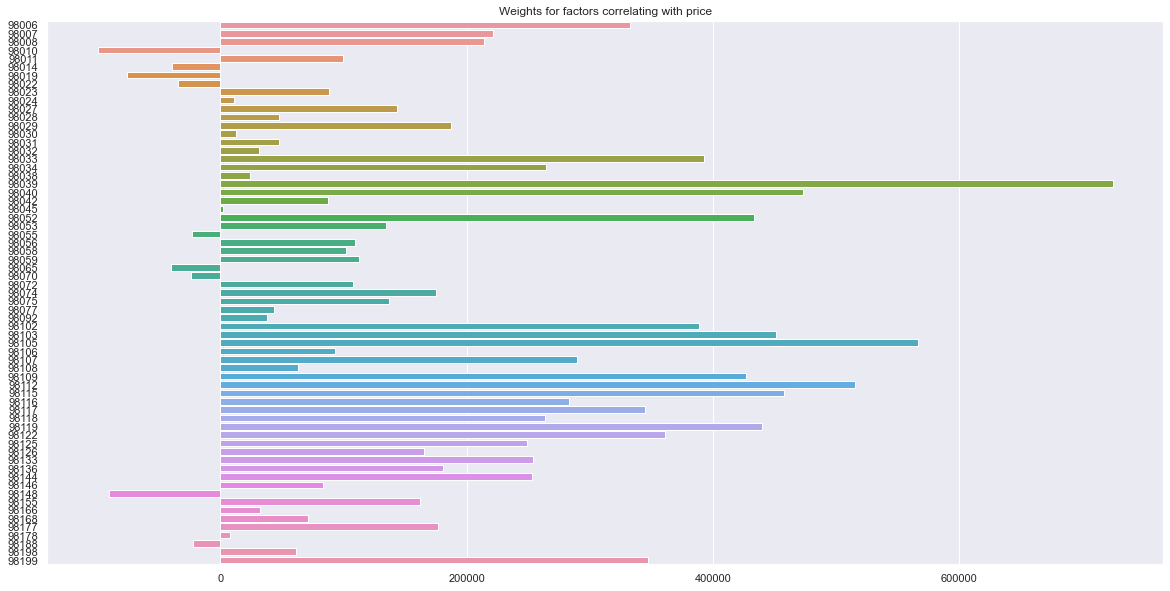

In [118]:
#weights for just zip
plt.figure(figsize=(20,10))
sns.barplot(y = weights[14::].index, x = weights[14::].values)
plt.title("Weights for factors correlating with price")

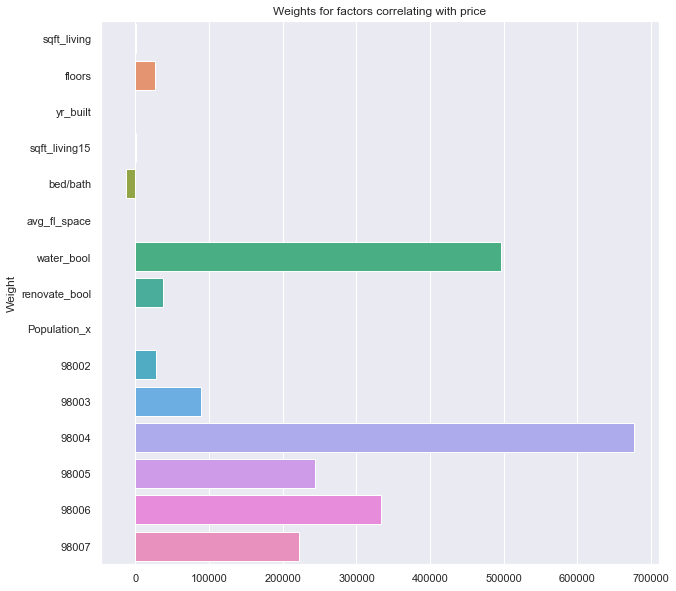

In [119]:
#weights for all but zipcode
plt.figure(figsize=(10,10))
sns.barplot(y = weights[1:16].index, x = weights[1:16].values)
plt.title("Weights for factors correlating with price")
plt.ylabel("Weight")
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

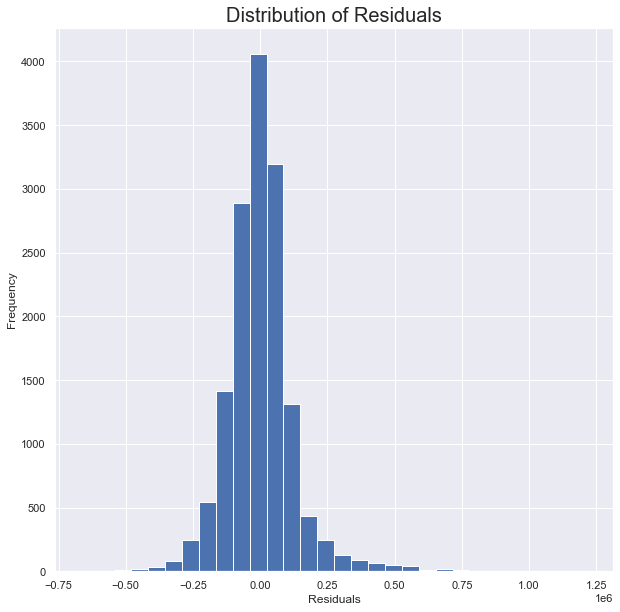

In [120]:
plt.figure(figsize = (10,10))
plt.hist(model_2.resid, bins = 30, )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontsize = 20)

In [121]:
#standardizing the variables so we can see on level field how much importance each variable carries
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())
X_standard_aug = sm.add_constant(X_standard)

results_standardized = sm.OLS(y, X_standard_aug).fit()

In [122]:
weights = results_standardized.params
weights

const            518851.975431
sqft_living      126252.130413
floors            14685.821415
yr_built         -12180.791432
sqft_living15     47060.930225
                     ...      
98177             25983.617384
98178              5140.749256
98188              1625.748935
98198              5468.975789
98199             47783.253702
Length: 79, dtype: float64

Text(0.5, 1.0, 'Weights for factors correlating with price')

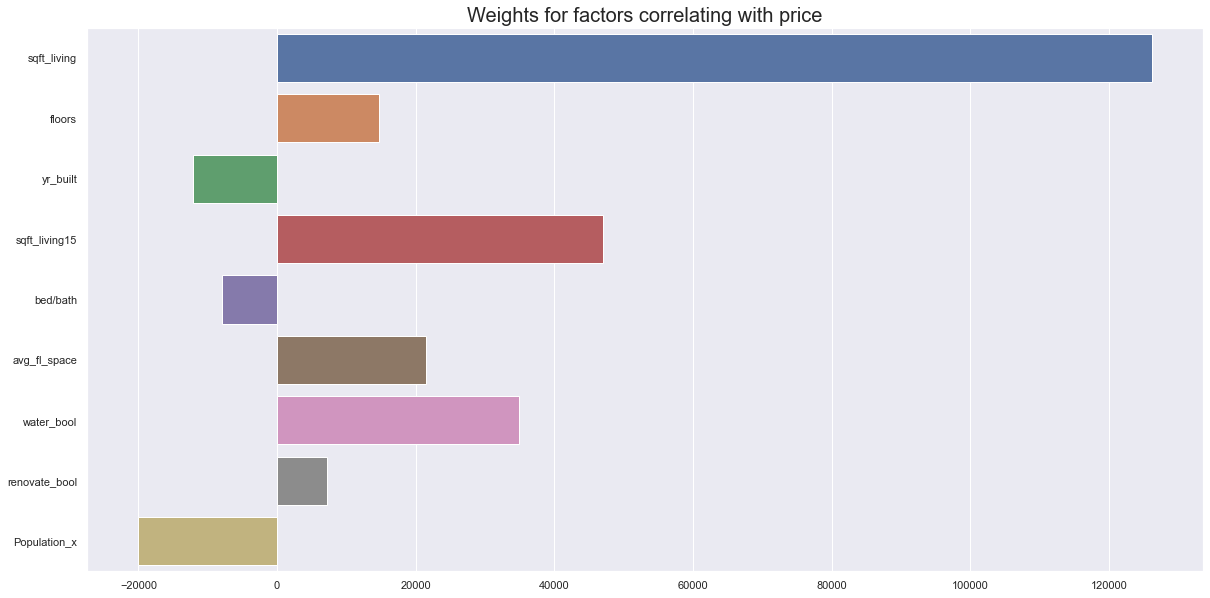

In [124]:
#weights for all but zip standardized
plt.figure(figsize=(20,10))
sns.barplot(y = weights[1:10].index, x = weights[1:10].values)
plt.title("Weights for factors correlating with price", fontsize = 20)

Text(0.5, 1.0, 'Weights for factors correlating with price')

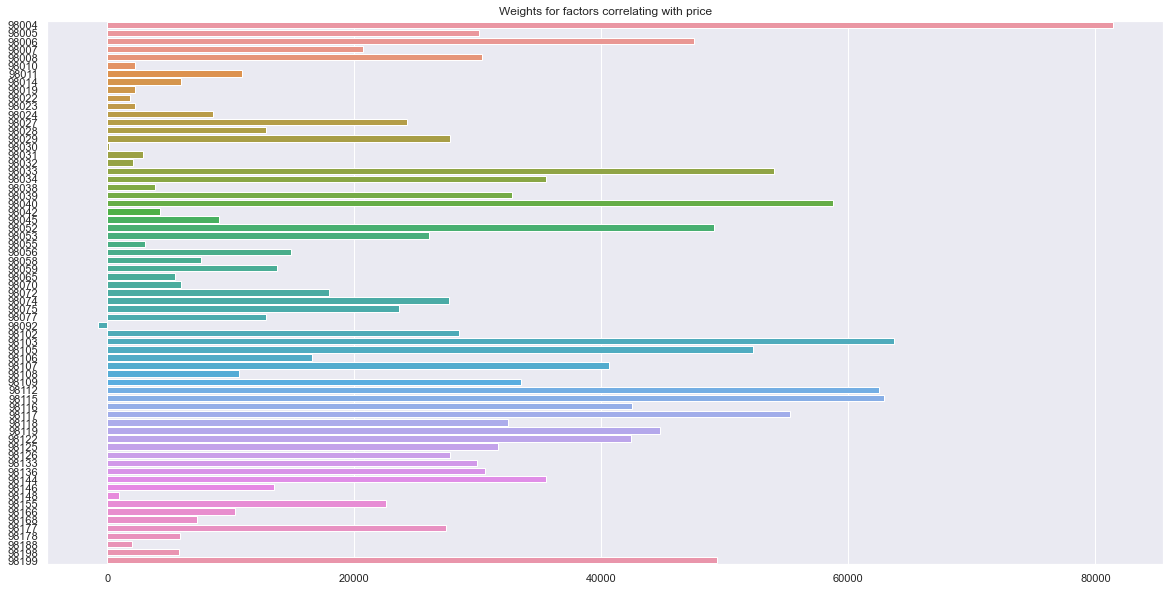

In [91]:
#weights for just zip standardized
plt.figure(figsize=(20,10))
sns.barplot(y = weights[14::].index, x = weights[14::].values)
plt.title("Weights for factors correlating with price")

In [92]:
print(results_standardized.rsquared)

0.810565598877543


In [93]:
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     802.5
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:29:37   Log-Likelihood:            -1.9591e+05
No. Observations:               14897   AIC:                         3.920e+05
Df Residuals:                   14817   BIC:                         3.926e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.189e+05   1022.655    507.358      0.000    5.17e+05    5.21e+05
sqft_living     1.71e+05   3288.620     52.005      0.000    1.65e+05    1.77e+05
floors        -2.097e+04   2751.369     -7.622      0.000   -2.64e+04   -1.56e+04
sqft_basement -3.353e+04   1865.238    -17.979      0.000   -3.72e+04   -2.99e+04
yr_built      -5828.6388   1741.979     -3.346      0.001   -9243.133   -2414.144
yr_renovated   9.491e+05    1.3e+05      7.293      0.000    6.94e+05     1.2e+06
sqft_living15  4.336e+04   1765.495     24.561      0.000    3.99e+04    4.68e+04
bed/bath      -1.155e+04   1267.115     -9.117      0.000    -1.4e+04   -9069.137
avg_fl_space  -8567.4155   2567.084     -3.337      0.001   -1.36e+04   -3535.613
water_bool     3.594e+04   1061.916     33.845      0.000    3.39e+04     3.8e+04
renovate_bool -9.413e+05    1.3e+05     -7.232      0.000    -1.2e+06   -6.86e+05
Population_x  -1.999e+04    677.564    -29.506      0.000   -2.13e+04   -1.87e+04
98002          2805.0056   1277.651      2.195      0.028     300.652    5309.359
98003          3780.8841   1422.727      2.657      0.008     992.163    6569.605
98004           8.14e+04   1373.525     59.261      0.000    7.87e+04    8.41e+04
98005          3.012e+04   1233.460     24.417      0.000    2.77e+04    3.25e+04
98006          4.753e+04   1599.779     29.713      0.000    4.44e+04    5.07e+04
98007          2.072e+04   1188.855     17.429      0.000    1.84e+04    2.31e+04
98008          3.035e+04   1354.882     22.402      0.000    2.77e+04     3.3e+04
98010          2268.2017   1113.336      2.037      0.042      85.926    4450.478
98011          1.091e+04   1264.512      8.624      0.000    8426.481    1.34e+04
98014          5943.1734   1142.451      5.202      0.000    3703.828    8182.519
98019          2232.7893   1194.839      1.869      0.062    -109.243    4574.822
98022          1882.0729   1284.464      1.465      0.143    -635.637    4399.783
98023          2255.2853   1648.303      1.368      0.171    -975.593    5486.164
98024          8547.6871   1102.148      7.755      0.000    6387.340    1.07e+04
98027          2.429e+04   1471.709     16.504      0.000    2.14e+04    2.72e+04
98028          1.286e+04   1337.638      9.612      0.000    1.02e+04    1.55e+04
98029          2.773e+04   1407.030     19.710      0.000     2.5e+04    3.05e+04
98030           183.6619   1341.360      0.137      0.891   -2445.569    2812.893
98031          2901.2876   1375.448      2.109      0.035     205.239    5597.336
98032          2096.1398   1209.435      1.733      0.083    -274.502    4466.782
98033          5.399e+04   1526.948     35.361      0.000     5.1e+04     5.7e+04
98034          3.552e+04   1650.709     21.517      0.000    3.23e+04    3.88e+04
98038          3876.7918   1666.362      2.326   